In [1]:
#import all the packages
#load the gym library
import gym
import seaborn
import matplotlib.pyplot as plt
from numpy import linalg as L2
import numpy as np
import random
import math

#creating the environment
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)


#initialize all the values
#total_epsiodes
episode_count = 10000  
learning_rate = 0.7  
 #max_steps
steps = 99              
gamma = 0.9

#epsilon value
e = 1.0
#max_epsilon
max_e = 1.0
#min_epsilon
min_e = 0.01
decay_rate = 0.005

#initialize the q table
tabular_q = np.zeros((16,4)) #qtable






In [2]:
#implementation of tabular Q-Learnng
#initialize reward values,G_k and Q_value
reward_values = []
G_k = np.zeros(episode_count)
Q_value = np.zeros((episode_count,16,4))
#iterate through all episodes
for episode in range(episode_count):
    state = env.reset()
    step = 0
    terminal = False
    cum_rewards = 0

    #iterate through all steps in each episode
    for step in range(steps):
        #randomly generate a sample between 0 and 1 for the exploitation and exploration tradeoff
        tradeoff = random.uniform(0,1)
        
        if tradeoff > e:
            action = np.argmax(tabular_q[state,:])
            
        else:
            action = env.action_space.sample()
            
        #get one sample a time from the environment
        next_s, reward, terminal, info = env.step(action) 
        
        #update the q-values
        tabular_q[state,action] = tabular_q[state,action] + learning_rate * (reward + gamma * np.max(tabular_q[next_s, :]) - tabular_q[state,action])
        Q_value [episode,state,action] = tabular_q[state,action]
        cum_rewards = cum_rewards + reward
        G_k[episode] = G_k[episode] + reward * (math.pow(gamma,step)) 
        
        state = next_s
        
        if terminal == True :
            break
    

    e = min_e + (max_e-min_e)*np.exp(-decay_rate*episode)
    reward_values.append(cum_rewards)
    
print("Return over time: " + str(sum(reward_values)/episode_count))
print(tabular_q)


  

Return over time: 0.4029
[[3.42454643e-02 1.24159911e-02 2.28866234e-02 1.21490165e-02]
 [3.21269811e-03 2.55052231e-02 4.22933321e-03 8.18162328e-03]
 [8.05672075e-03 2.03939639e-03 3.77115277e-03 7.24823548e-04]
 [1.76001820e-04 4.32588015e-04 2.42736955e-04 9.31591385e-03]
 [6.68734743e-02 4.63205735e-03 2.18783678e-02 6.24279857e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.82413404e-01 1.15399421e-07 7.14277128e-04 9.36979111e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27907098e-03 1.30102261e-02 3.01760782e-02 2.93345941e-01]
 [4.52991251e-02 6.43890012e-01 1.48863009e-02 7.06226518e-04]
 [6.93069321e-01 6.06026011e-04 4.60859292e-03 2.83034011e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.98856264e-02 4.25354352e-02 7.04773898e-01 5.07197742e-02]
 [2.38002073e-01 9.70952899e-01 1.31259179e-01 1.51775897e-01]
 [0.00000000e+00 0.00000000e+0

In [3]:
#value iteration is taken to find the q values
def value_iteration(env):
    max_iterations = 100
    value = np.zeros(16) #statevalue
    q_values = np.zeros((16,4))
    change = np.zeros((max_iterations))
    nextstatevalue = np.zeros(16)  #newStateValue
    for i in range(max_iterations):
        for state in range(16):
            actionvalues = []     #actionvalues
            for action in range(4):
                statevalue = 0
                for j in range(len(env.P[state][action])):
                    prob, next_s, r, terminal = env.P[state][action][j]
                    value_stateaction = prob * (r + gamma*value[next_s])
                    statevalue = statevalue + value_stateaction
                q_values[state,action] = statevalue
                actionvalues.append(statevalue)
            idealaction = np.argmax(np.asarray(actionvalues))
            nextstatevalue[state] = actionvalues[idealaction]        
       
        change[i] = L2.norm(nextstatevalue - value)
                
        if i > 1000 :
            if sum(value) - sum(nextstatevalue) < 1e-05:
                break
                print(i)
        else:
            value = nextstatevalue.copy()
    return q_values

In [4]:
#assign to qvals
qvals = value_iteration(env)

Text(0, 0.5, 'Difference showing ||Qk - Q*||')

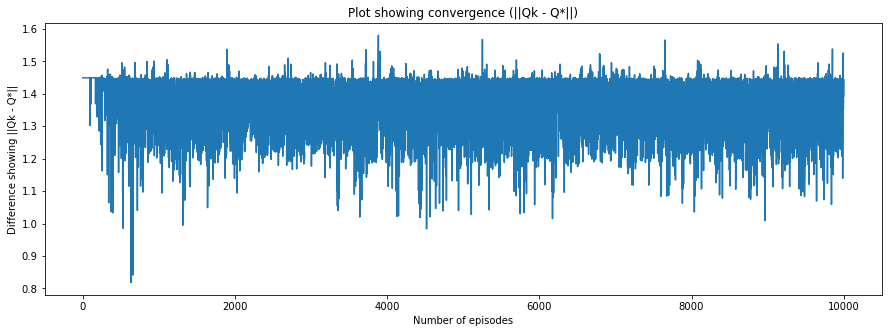

In [5]:
#plot showing difference between q value for epsiode and optimal q obtained
from numpy import linalg as L2
import matplotlib.pyplot as plt
change = []
for i in range(episode_count):
    change.append(L2.norm(Q_value[i]-qvals))
index = np.argmax(np.array(change) == 0)
plt.figure(figsize=(15,5))
plt.plot(change)
plt.title('Plot showing convergence (||Qk - Q*||)')
plt.xlabel('Number of episodes')
plt.ylabel('Difference showing ||Qk - Q*||')

In [6]:
#plot using sliding window average
def slidingwindow_average(change, n) :
    return_value = np.cumsum(change, dtype=float)
    return_value[n:] = return_value[n:] - return_value[:-n]
    return return_value[n - 1:] / n


Text(0, 0.5, 'Difference showing ||Qk - Q*||')

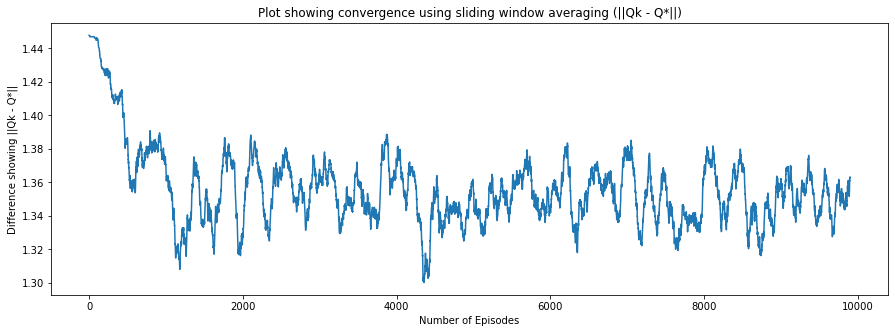

In [7]:
plt.figure(figsize=(15,5))
plt.plot(slidingwindow_average(change,100))
plt.title('Plot showing convergence using sliding window averaging (||Qk - Q*||)')
plt.xlabel('Number of Episodes')
plt.ylabel('Difference showing ||Qk - Q*||')

In [8]:
#to visualize policy iteration through heatmap
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()


Value Function [0.034245464286134945, 0.025505223077992013, 0.008056720749629522, 0.009315913849165485, 0.06687347428256926, 0.0, 0.18241340398879452, 0.0, 0.293345940787596, 0.6438900115205866, 0.6930693205489566, 0.0, 0.0, 0.7047738976680779, 0.9709528988865888, 0.0]
Policy [0, 1, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


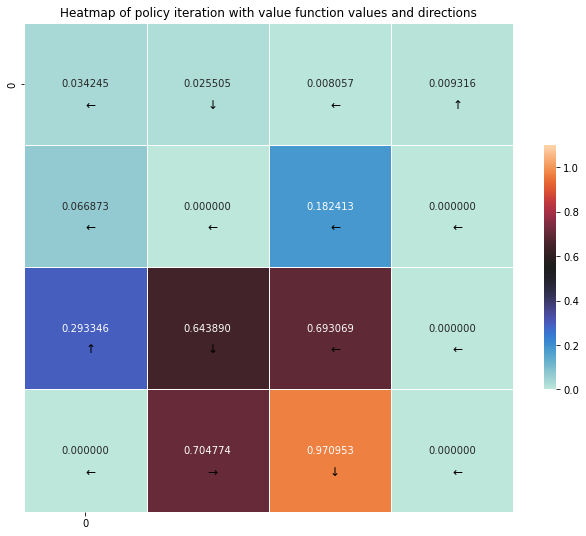

In [9]:
#obtaining the optimal policy and optimal value
optimal_policy = []
for i in range(16):
    optimal_policy.append(np.argmax(tabular_q[i]))
optimal_value = []
for j in range(16):
    optimal_value.append(np.max(tabular_q[j,:]))
#Obtaining the value function, policy and visualizing the heat map for Q-Learning
fancy_visual(optimal_value,optimal_policy)

Text(0, 0.5, 'Gk Value')

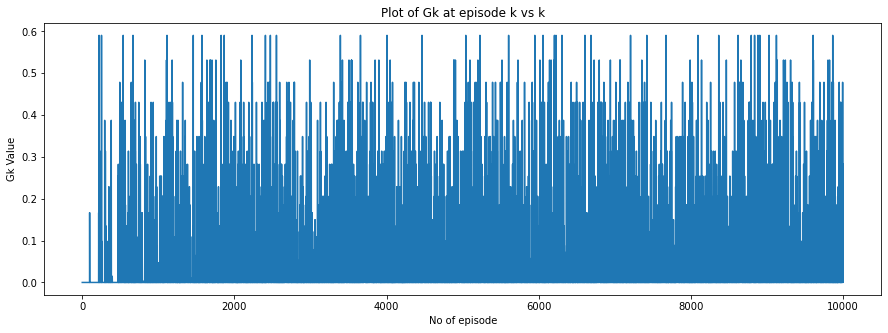

In [10]:
#plot for cummulative reward for episode k vs episode k
plt.figure(figsize=(15,5))
plt.plot(G_k)
plt.title('Plot of Gk at episode k vs k')
plt.xlabel('No of episode')
plt.ylabel('Gk Value')

Text(0, 0.5, 'Gk Value')

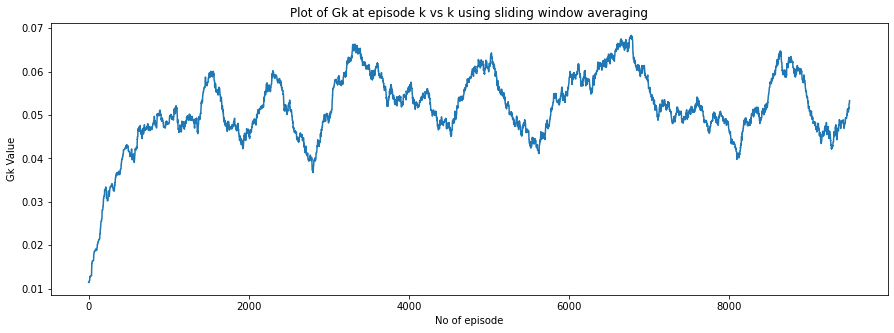

In [11]:
#plot for cummulative reward for episode k vs k using sliding window technique
plt.figure(figsize=(15,5))
plt.plot(slidingwindow_average(G_k,500))
plt.title('Plot of Gk at episode k vs k using sliding window averaging')
plt.xlabel('No of episode')
plt.ylabel('Gk Value')